# Research HW1 by Mukhammadrizo Maribjonov

### Background info

When you're driving with constant speed, even when turning, your tangential acceleration remains constant because your speed isn't changing. However, your normal acceleration increases while turning. Here's why:

Tangential Acceleration: This component of acceleration is parallel to the velocity vector. Since you're maintaining a constant speed, there's no change in the magnitude of your velocity vector along the direction of motion. Hence, tangential acceleration remains constant.

Normal Acceleration: This component of acceleration is perpendicular to the velocity vector, pointing towards the center of curvature of your path. When you're turning, your direction of motion is changing continuously, even if your speed remains constant. This change in direction requires a force towards the center of curvature, resulting in an increase in normal acceleration. The tighter the turn, the greater the change in direction and thus the greater the normal acceleration required.

In summary, while driving with constant speed, the acceleration that increases when turning is the normal acceleration. This increase is necessary to continuously change the direction of your velocity vector as you navigate the curve.

## Task

We have a mobile vehicle, which should survive after the track. We have

some predefined trajectory, which is given in y(x) format — our goal to pass this
trajectory as fast as possible. But at the end of the course, there is a drop-off. It
means that we should stop our machine at the end of the trajectory. We have to
establish some constraints, such as max tangent acceleration (max power on the
motor) and normal (road adhesion). Despite it, the best way is to represent our
robot as a particle. How should we move (speed and acceleration) for solving
such a task?


## Given

$a_{t_{max}} = 2\small{m/s^2}\\
a_{n_{max}} = 3\small{m/s^2}\\
v_{max} = 3\small{m/s}\\
y(x) = Axln(\frac{x}{B}),\\
\text{where } A = 3,\ B = 5, x \text{ exists on } [0\dots4]
$

## To find

$Y(x),\ Y(t),\ v(t),\ a_t(t),\ a_n(t),\ t$

## Solution

To minimise total travel time either $a_t$, $a_n$, or $v$ must equal to it's maximum.
Let's find their relations for each point on the path.

**Tangential Component**: This component is responsible for changes in speed. It accounts for the tangential acceleration.

**Normal Component**: This component is responsible for changes in direction. It accounts for the normal acceleration.

In fact at any point on the path we are only limited by $a_n$ and $v$ notice that $a_n ∼ v^2$, while $a_{\tau}$ shows how fast we can change $v$.

$a_n = \frac{v^2}{r}$, where $r(x) = \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|$ is a radius of curvature at point $x$.

From this we can derive 2 constraints for $v$:
$
\begin{cases}
a_n \le 3 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
$
$$
\begin{cases}
v^2 / r \le 3 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
\\
\begin{cases}
v \le \sqrt{ a_{t_{max}} * \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|};\\
v \le v_{max};
\end{cases}
$$

* $y(x) = 3xln(\frac{x}{5})$
* $\dot y(x) = 3ln(x) - 3ln(5) + 3$
* $\ddot y(x) = \frac{3}{x}$

### Let's Plot this values

#### Imports

In [403]:
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import animation
from scipy.integrate import quad
import pandas as pd 

Note: you may need to restart the kernel to use updated packages.


#### Plotting

In [404]:
ATMAX = 2
ANMAX = 3
VMAX = 3
XMIN = 0
XMAX = 4
dx = 0.0001

In [405]:
x = np.linspace(XMIN, XMAX, 1000)
y = lambda x: 3*x*np.log(x/5)
dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
ddy = lambda x: 3/x

# natural form
sigma = np.array([quad(lambda x: np.sqrt(1 + (dy(x)) ** 2), XMIN, x)[0] for x in x])
dsigma = np.gradient(sigma, x)
ddsigma = np.gradient(dsigma, x)

curvature = np.abs(ddy(x)) / ((1 + dy(x) ** 2) ** (3 / 2))

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
/tmp/ipykernel_85018/1548475892.py:7: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  sigma = np.array([quad(lambda x: np.sqrt(1 + (dy(x)) ** 2), XMIN, x)[0] for x in x])
/tmp/ipykernel_85018/1548475892.py:4: RuntimeWarning: divide by zero encountered in divide
  ddy = lambda x: 3/x
/tmp/ipykernel_85018/1548475892.py:11: RuntimeWarning: invalid value encountered in divide
  curvature = np.abs(ddy(x)) / ((1 + dy(x) ** 2) ** (3 / 2))


/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: invalid value encountered in multiply
  y = lambda x: 3*x*np.log(x/5)


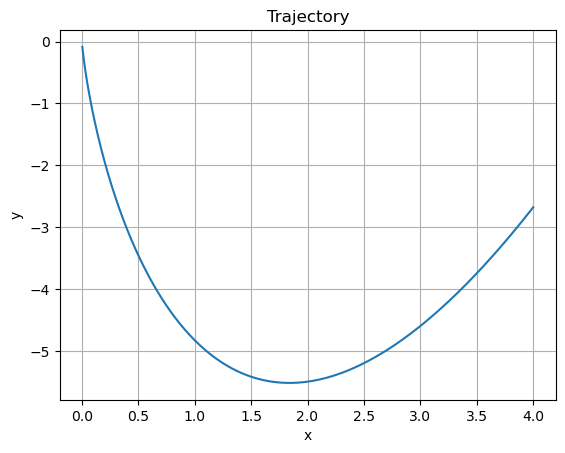

In [406]:
# draw trajectory on a plane

plt.grid()

plt.plot(x, y(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory")
plt.savefig("trajectory.png")


Natural form $\sigma(x) = \int_{0}^{4} \sqrt{1 + \dot y(x)^2},dx$

9.80316612025513

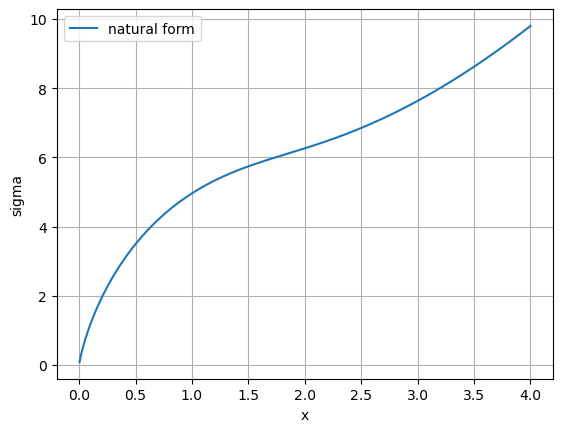

In [407]:
# show sigma by x

plt.grid()
plt.plot(x, sigma, label="natural form")
plt.xlabel("x")
plt.ylabel("sigma")

plt.legend()

sigma[-1]


$k(x) = \frac{\ddot y}{(\sqrt(1 + (\dot y)^2))^3}$

Text(0.5, 1.0, 'Curvature')

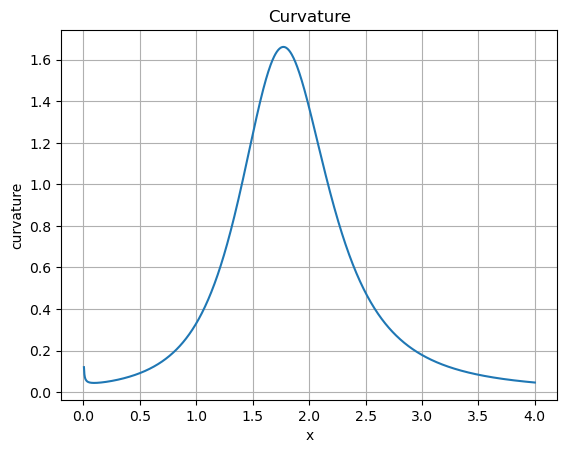

In [408]:
# let's find what is curvature at the each x

plt.grid()
plt.plot(x, curvature)
plt.xlabel("x")
plt.ylabel("curvature")
plt.title("Curvature")

Imagine we move with constant speed all the time, $v_{max} = 3$. How $a_n$ would look like in that case depending on cuvature $k(x)$?

$a_n(x) = k(x) \cdot v_{max}^2$, where $v_{max} = 3$

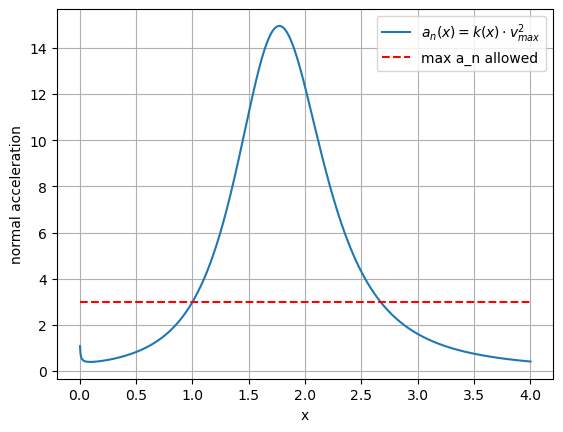

In [409]:
plt.grid()
plt.plot(x, curvature * VMAX**2, label='$a_n(x) = k(x) \cdot v_{max}^2$')
plt.hlines(
    ANMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max a_n allowed",
)
plt.xlabel("x")
plt.ylabel("normal acceleration")
plt.legend()

plt.savefig("normal_acceleration_lim.png")


As we see that $a_n$ exeeds the allowed $3$ at turning points. It is exceeding because to provide constant speed of $v_{max} = 3$ in turning points, we need more $a_n$. To provide a constant speed of $v_{max} = 3$ at turning points we have to increase $a_n$. But we can't have $a_n > 3$. In order to not to exceed the limit, we need to slow down in turning point, such that we have $a_n = 3$

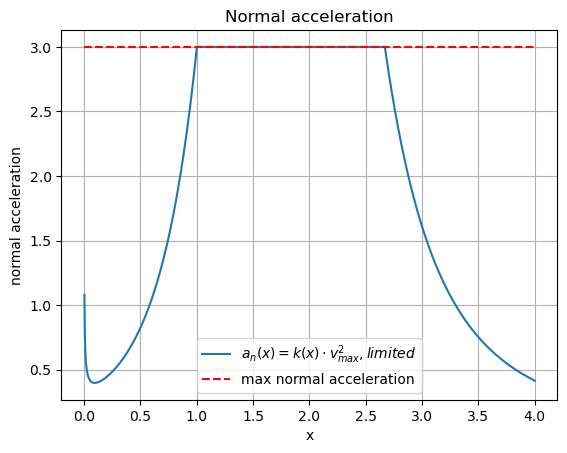

In [410]:
# set maximum available normal acceleration

accnmax = np.clip(curvature * VMAX**2, a_min=None, a_max=ANMAX)

plt.grid()
plt.plot(x, accnmax, label='$a_n(x) = k(x) \cdot v_{max}^2, limited$')
plt.hlines(
    ANMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max normal acceleration",
)
plt.xlabel("x")
plt.ylabel("normal acceleration")
plt.title("Normal acceleration")
plt.legend()

Now we have allowed $a_n$. Now as $a_n$ is related to $v$, at each point along $x$, we can compute $v$.

$v = \sqrt{\frac{a_n(x)}{k(x)}}$

/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: invalid value encountered in multiply
  y = lambda x: 3*x*np.log(x/5)


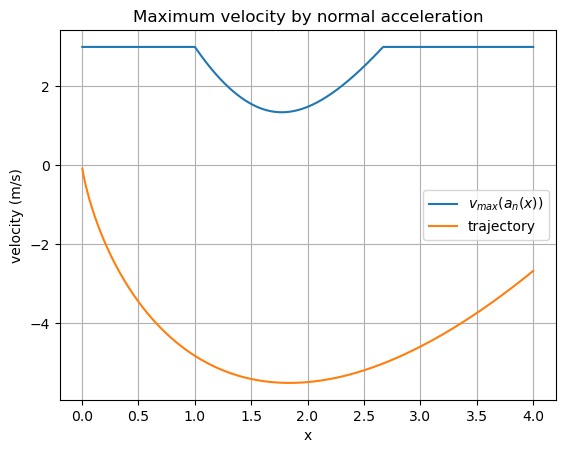

In [411]:
# compute maximum available velocity through the each point depending the normal acceleration

vmax_n = np.sqrt(accnmax / curvature)

plt.grid()
plt.plot(x, vmax_n, label="$v_{max} (a_n(x))$")
plt.plot(x, y(x), label="trajectory")

plt.xlabel("x")
plt.ylabel("velocity (m/s)")
plt.title("Maximum velocity by normal acceleration")

plt.legend()
plt.savefig("velocity_by_normal_acceleration.png")

From the graph, we see that we slow down in turning points. However, this is not the end. Now we are not moving with constant velcity. At some points we are slowing down (Changing the values of velcotiy). $a_t$ is responsible for the change of the value of velcotiy, and it is also limited. If you have a limitation on $a_t$, it means there's a maximum rate at which you can change your speed while driving. In our case it is $a_t = 2$.


**Tangential acceleration**

By differentiating the velocity by $x$, we can find the tangential acceleration $a_t(x)$ for each $x$.

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


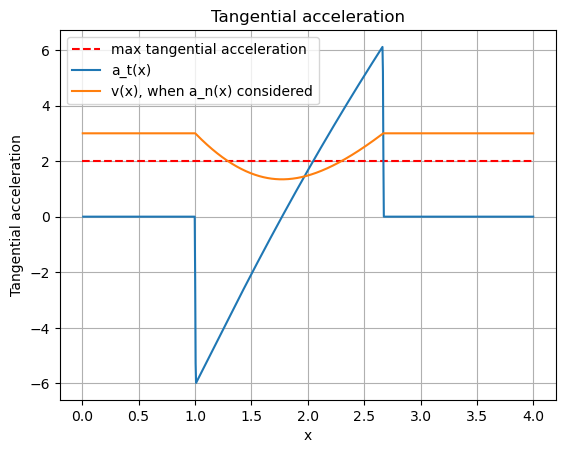

In [412]:
dv_dx = np.gradient(vmax_n, x)
dy_values = dy(x)

acct = dv_dx * vmax_n / np.sqrt(1 + dy_values**2)

plt.hlines(
    ATMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max tangential acceleration",
)
plt.plot(x, acct, label='a_t(x)')
plt.plot(x, vmax_n, label='v(x), when a_n(x) considered')
plt.xlabel("x")
plt.ylabel("Tangential acceleration")
plt.title("Tangential acceleration")
plt.legend()
plt.grid()

$a_t(x)$ is out of the bounds. It should be in range of [-2, 2]. Let's approximate $v$ manually.

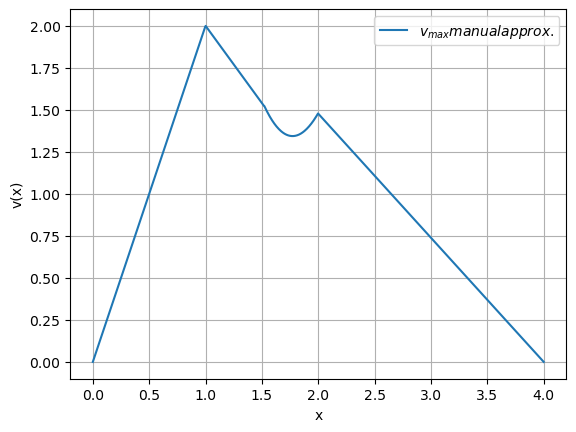

In [421]:
for j in range(1000):
    if x[j] < 1:
        vmax_n[j] = 2*x[j]
    elif x[j] < 1.52:
        vmax_n[j] = -0.92*(x[j]-1)+2
    elif x[j] > 2.0:
        vmax_n[j] = -0.7384022524192273*x[j] + 2.953609009676909
    

plt.grid()
plt.plot(x, vmax_n, label="$v_{max} manual approx.$")
plt.xlabel("x")
plt.ylabel("v(x)")
plt.legend()

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


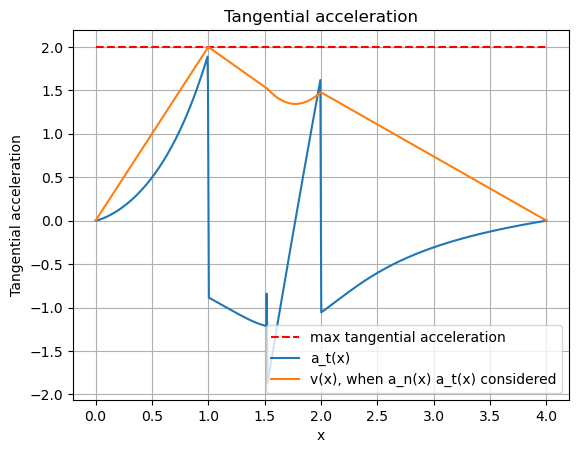

In [422]:
dv_dx = np.gradient(vmax_n, x)
dy_values = dy(x)

acct = dv_dx * vmax_n / np.sqrt(1 + dy_values**2)

plt.hlines(
    ATMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max tangential acceleration",
)
plt.plot(x, acct, label='a_t(x)')
plt.plot(x, vmax_n, label='v(x), when a_n(x) a_t(x) considered')
plt.xlabel("x")
plt.ylabel("Tangential acceleration")
plt.title("Tangential acceleration")
plt.legend()
plt.grid()

/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_85018/1548475892.py:2: RuntimeWarning: invalid value encountered in multiply
  y = lambda x: 3*x*np.log(x/5)


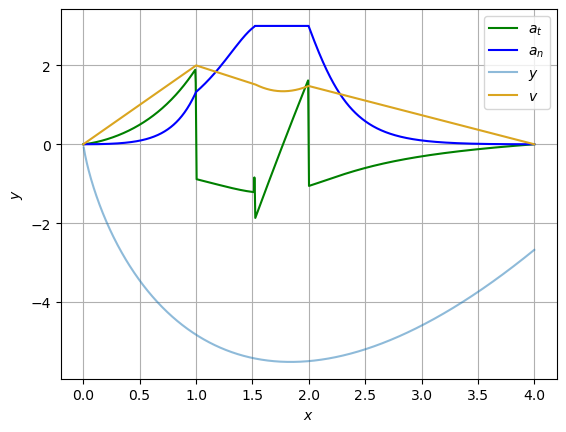

In [430]:
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
# ax1.set_ylim(-10, 10)

plt.plot(x, np.gradient(vmax_n, x)*vmax_n/np.sqrt(1+dy(x)**2), color='g', label=r'$a_t$')
plt.plot(x, np.power(vmax_n,2)*curvature, color='b', label=r'$a_n$')
plt.plot(x, y(x), alpha=0.5, label=r'$y$')
plt.plot(x, vmax_n, color='goldenrod', label=r'$v$')
plt.legend()

The final time $t$ is:

$t=\int^4_0\frac{\sigma^{\prime}_x}{v}$

$t=\int^4_0\frac{\sqrt{1+y^{\prime\ 2}}}{v}dx$

In [431]:
print(np.trapz(np.sqrt(1+np.power(dy(x)[1:-1],2))/vmax_n[1:-1], dx=dx))

1.2312687977834655


/tmp/ipykernel_85018/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


I got $t = 1.2312687977834655$, but it seems to be incorrect